## 2. Classification linéaire : le Perceptron 


**2.1 Classification de points du plan avec un perceptron**

_**Rappel du cours :**_ 
Le perceptron est une architecture simple de réseau de neurones utilisée pour la classification binaire. Le modèle linéaire associé est défini par :

$$
\hat{y} = \sigma(Wx + b)
$$

où $W$ est la matrice de poids, $b$ est le vecteur de biais, $x$ est l'entrée et $\sigma$ est la fonction d'activation.

La fonction d'activation la plus courante pour le perceptron est la fonction signe :

$$
\sigma(z) = \begin{cases} 
      1 & z \geq 0 \\
      -1 & z < 0 
   \end{cases}
$$

Lors de l'apprentissage, on met à jour les poids et les biais avec la règle suivante :

$$
W \leftarrow W + \eta (y - \hat{y})x \\
b \leftarrow b + \eta (y - \hat{y})
$$

où $\eta$ est le taux d'apprentissage.


### 2.1   classification points du plan


Générez un ensemble de données de points en deux dimensions avec deux classes séparables linéairement. Implémentez un perceptron qui apprend à classer ces points en utilisant la fonction signe comme fonction d'activation.

**Question 1.** Générez les données : créez deux groupes de points avec des coordonnées $(x,y)$ uniformément réparties, chacun étant associé à une classe différente.

``` python
import numpy as np

# Nombre de points à générer
n_points = 100


# Génération des données en prenant deux distribution normales
class_1 = np.random.normal(-3, 1, size=(n_points, 2))
class_2 = np.random.normal(3 , 1, size=(n_points, 2))
```


In [1]:
import numpy as np

# Nombre de points à générer
n_points = 100


# Génération des données en prenant deux distribution normales
class_1 = np.random.normal(-3, 1, size=(n_points, 2))
class_2 = np.random.normal(3 , 1, size=(n_points, 2))


**Question 2 :**  Affichez les points avec des marqueurs différents pour chaque classe.

``` python
import matplotlib.pyplot as plt

# Affichage des points
plt.scatter(class_1[:, 0], class_1[:, 1], marker='x', color='blue', label='Class 1')
plt.scatter(class_2[:, 0], class_2[:, 1], marker='o', color='red', label='Class 2')

plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.legend()
```


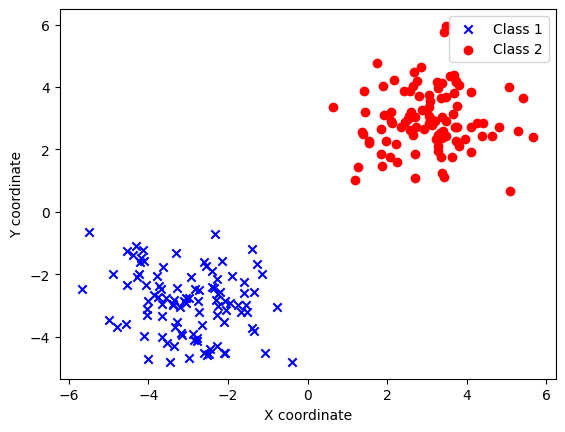

In [2]:
import matplotlib.pyplot as plt

# Affichage des points
plt.scatter(class_1[:, 0], class_1[:, 1], marker='x', color='blue', label='Class 1')
plt.scatter(class_2[:, 0], class_2[:, 1], marker='o', color='red', label='Class 2')

plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.legend()


**Question 3:** Implémentez un perceptron pour classer ces points. Initialisez les poids et le biais avec des valeurs nulles.

``` python
# Fonction d'activation signe
def sign_activation(z):
    return 1 if z >= 0 else -1

# Initialisation des poids et du biais
weights = np.zeros(2)
bias = 0
learning_rate = 0.1
```


In [3]:
# Fonction d'activation signe
def sign_activation(z):
    return 1 if z >= 0 else -1

# Initialisation des poids et du biais
weights = np.zeros(2)
bias = 0
learning_rate = 0.1


**Question 4 :** Faites une passe d'apprentissage sur l'ensemble des données. Mettez à jour les poids et le biais selon la règle d'apprentissage du perceptron.

``` python
for point, label in zip(np.vstack([class_1, class_2]), np.array([1]*n_points + [-1]*n_points)):
    # Calcul de l'output du perceptron
    output = sign_activation(np.dot(weights, point) + bias)
    
    # Mise à jour des poids et du biais
    weights += learning_rate * (label - output) * point
    bias += learning_rate * (label - output)
```

In [4]:
for point, label in zip(np.vstack([class_1, class_2]), np.array([1]*n_points + [-1]*n_points)):
    # Calcul de l'output du perceptron
    output = sign_activation(np.dot(weights, point) + bias)

    # Mise à jour des poids et du biais
    weights += learning_rate * (label - output) * point
    bias += learning_rate * (label - output)


**Question 5 :**. Tracez la ligne de séparation du perceptron sur le graphique des données. 

``` python
# Coordonnées de la ligne de séparation
x_sep = np.linspace(-2, 2, 100)
y_sep = (-weights[0] * x_sep - bias) / weights[1]

# Affichage des points et de la ligne de séparation
plt.scatter(class_1[:, 0], class_1[:, 1], marker='x', color='blue', label='Class 1')
plt.scatter(class_2[:, 0], class_2[:, 1], marker='o', color='red', label='Class 2')
plt.plot(x_sep, y_sep, linestyle='--', color='green', label='Perceptron separator')

plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.legend()
```

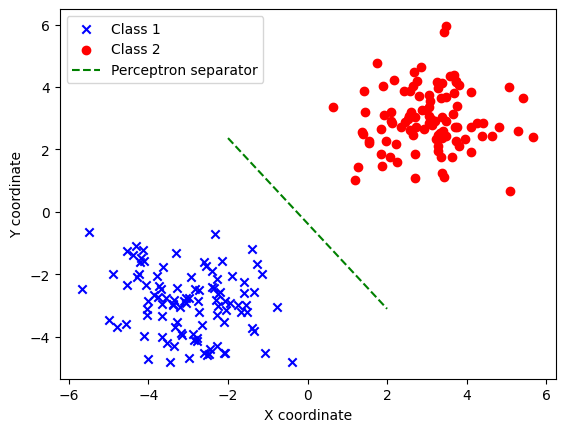

In [5]:
# Coordonnées de la ligne de séparation
x_sep = np.linspace(-2, 2, 100)
y_sep = (-weights[0] * x_sep - bias) / weights[1]

# Affichage des points et de la ligne de séparation
plt.scatter(class_1[:, 0], class_1[:, 1], marker='x', color='blue', label='Class 1')
plt.scatter(class_2[:, 0], class_2[:, 1], marker='o', color='red', label='Class 2')
plt.plot(x_sep, y_sep, linestyle='--', color='green', label='Perceptron separator')

plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.legend()

### 2.2  vitesse de convergence et séparabilité


Dans cette question, nous allons étudier la vitesse de convergence du perceptron et observer comment il évolue en fonction du nombre d'itérations. La convergence dépend notamment de la séparabilité des données.


```python
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from matplotlib.animation import FuncAnimation
from IPython import display
```

In [6]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from matplotlib.animation import FuncAnimation
from IPython import display

**Question 1 :** Générez des données séparables et non séparables linéairement en utilisant la fonction `make_classification` de scikit-learn.

pour connaitre la forme de sont appel dans une cellue de code tapez : 
```
make_classification?
```
pour ouvrir l'aide de la fonction, ou alors :   
```
make_classification??
```
pour ouvrir le code de la fonction.

Écrivez une fonction qui renvois un jeux de données 
```python
def generate_data(separability = 1.0):
    X, y = make_classification(class_sep = separability ,n_samples=100, n_features=2, n_redundant=0,  n_informative=2, n_clusters_per_class=1, random_state=42)
    y[y == 0] = -1 # Remplacer les 0 par des -1 pour la classification binaire
    return  X, y
```

In [9]:
def generate_data(separability = 1.0):
    X, y = make_classification(class_sep = separability ,n_samples=100, n_features=2, n_redundant=0,  n_informative=2, n_clusters_per_class=1, random_state=42)
    y[y == 0] = -1 # Remplacer les 0 par des -1 pour la classification binaire
    return  X, y


**Question 2 :** écrivez une fonction compute_perceptron qui calcul l'évolution de la frontière de séparation durant les itération : 
```python 
def compute_perceptron(X, y, alpha = 0.1, n_iter = 10):
    # Implémentation de l'algorithme du perceptron
    w = np.random.rand(3)
    errors = []
    w_history = [w.copy()]

    for t in range(n_iter):
        error_count = 0
        for x, target in zip(X, y):
            input_with_bias = np.append(x, 1)
            prediction = np.sign(np.dot(w, input_with_bias))
            update = alpha * (target - prediction) * input_with_bias
            w += update
            if target != prediction:
                error_count += 1
        w_history.append(w.copy())
        errors.append(error_count)
    return w_history, errors
```


In [7]:
def compute_perceptron(X, y, alpha = 0.1, n_iter = 10):
    # Implémentation de l'algorithme du perceptron
    w = np.random.rand(3)
    errors = []
    w_history = [w.copy()]

    for t in range(n_iter):
        error_count = 0
        for x, target in zip(X, y):
            input_with_bias = np.append(x, 1)
            prediction = np.sign(np.dot(w, input_with_bias))
            update = alpha * (target - prediction) * input_with_bias
            w += update
            if target != prediction:
                error_count += 1
        w_history.append(w.copy())
        errors.append(error_count)
    return w_history, errors


**Question 3 :** Avec les lignes calculé on peut créer une annimation matplotlib avec la fonction suivante : 

```python
def create_annimation(w_history, X, y):
    fig, ax = plt.subplots()
    n_iter = len(w_history)
    def animate(i):
        ax.clear()
        current_w = w_history[i]
        ax.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
        x_line = np.linspace(min(X[:, 0]), max(X[:, 0]), 100)
        y_line = (-current_w[0] * x_line - current_w[2]) / current_w[1]
        ax.plot(x_line, y_line, '-r')
        ax.set_title(f"Iteration: {i}")

    ani = FuncAnimation(fig, animate, frames=n_iter, interval=500)
    return ani
```


```python
X, y = generate_data(0.1)
w_history, errors =  compute_perceptron(X, y, alpha = 0.1, n_iter = 10)
test1 = create_annimation(w_history, X, y)

display.HTML(test1.to_html5_video())
```

In [8]:
def create_annimation(w_history, X, y):
    fig, ax = plt.subplots()
    n_iter = len(w_history)
    def animate(i):
        ax.clear()
        current_w = w_history[i]
        ax.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
        x_line = np.linspace(min(X[:, 0]), max(X[:, 0]), 100)
        y_line = (-current_w[0] * x_line - current_w[2]) / current_w[1]
        ax.plot(x_line, y_line, '-r')
        ax.set_title(f"Iteration: {i}")

    ani = FuncAnimation(fig, animate, frames=n_iter, interval=500)
    return ani

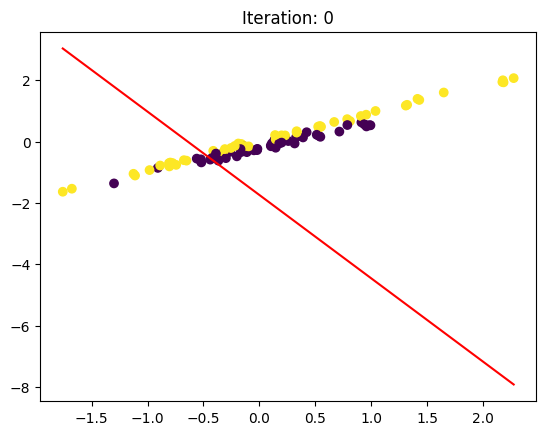

In [10]:
X, y = generate_data(0.1)
w_history, errors =  compute_perceptron(X, y, alpha = 0.1, n_iter = 10)
test1 = create_annimation(w_history, X, y)

display.HTML(test1.to_html5_video())

```python
ani.save("perceptron.gif")
```

pour sauvegarder l'annimation


### Ouverture 

On peut essayer de faire varier les parametres de l'apprentissage : le alpha et le nombre d'iterations

On peut aussi regarder comment converge l'estimation en fonction de alpha et de la séparabilité des données

En dehors de l'intéret pédagogique une fois qu'on a compris comment fonctionne un perceptron on a tout intéret à utiliser des version déja implémenter.

Le code suivant reproduit l'expérience plus haute dans un cadre ou on peut changer la dimension de l'espace d'entré (plus seulement 2D) et fait une optimisation des hyperparamètre du perceptron (nombre d'itérations et pas de descente) : 

```python
# grid search total epochs for the perceptron
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import Perceptron

# defintion d'un jeux de données, ici on peut jouer sur la taille (n_features) et la spéparabilité des classes
X, y = make_classification(n_samples=1000, n_features=10, n_informative=10, class_sep=0.9 ,  n_redundant=0, random_state=1)

# definition d'un model de perceptron
model = Perceptron(eta0=0.0001)


# definition du mode d'évaluation par cross validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# definition de la grille d'exploration des paramètres
grid = dict()
# On chois
grid['max_iter'] = [1, 10, 100, 1000, 10000, 100000]
grid['eta0'] = [0.1, 0.01, 0.001, 0.0001]

# la recherche du parametrage optimal :
search = GridSearchCV(model, grid, scoring='accuracy', cv=cv, n_jobs=-1)
results = search.fit(X, y)

# le résultat
print('Mean Accuracy: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)
# summarize all
means = results.cv_results_['mean_test_score']
params = results.cv_results_['params']
for mean, param in zip(means, params):
    print(">%.3f with: %r" % (mean, param))
```
